In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import plot_tree
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv(r"C:\Mba notes\novels\Kaggle 30 days\train.csv",index_col='id')
df1

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,,,,,,,
1,B,B,B,C,B,B,A,E,C,N,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
2,B,B,A,A,B,D,A,F,A,O,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
3,A,A,A,C,B,D,A,D,A,F,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
4,B,B,A,C,B,D,A,E,C,K,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
6,A,A,A,C,B,D,A,E,A,N,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499993,B,B,A,A,B,D,A,E,A,I,...,0.769792,0.450538,0.934360,1.005077,0.853726,0.422541,1.063463,0.697685,0.506404,7.945605
499996,A,B,A,C,B,B,A,E,E,F,...,0.528056,0.508502,0.358247,0.257825,0.433525,0.301015,0.268447,0.577055,0.823611,7.326118
499997,B,B,A,C,B,C,A,E,G,F,...,0.688747,0.372425,0.364936,0.383224,0.551825,0.661007,0.629606,0.714139,0.245732,8.706755


In [3]:
df1.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,,,,,,,
1,B,B,B,C,B,B,A,E,C,N,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
2,B,B,A,A,B,D,A,F,A,O,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
3,A,A,A,C,B,D,A,D,A,F,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
4,B,B,A,C,B,D,A,E,C,K,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
6,A,A,A,C,B,D,A,E,A,N,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


In [4]:
df1['cat0'].dtype

dtype('O')

In [5]:
num_col.round(2)

NameError: name 'num_col' is not defined

In [3]:
def convert_data(df1):
    cat_col1=[i for i in df1.columns if df1[i].dtype=='O']
    cat_col=df1[cat_col1]
    num_col1=[i for i in df1.columns if df1[i].dtype=='float64' or df1[i].dtype=='int64']
    num_col=df1[num_col1]
    cat_col.columns=cat_col1
    O=OrdinalEncoder()
    cat_col=O.fit_transform(cat_col)
    cat_col=pd.DataFrame(cat_col,columns=cat_col1)
    num_col=pd.DataFrame(num_col)
    cat_col.reset_index(drop=True, inplace=True)
    num_col.reset_index(drop=True,inplace=True)
    df2=pd.concat([cat_col.reset_index(drop=True),num_col.reset_index(drop=True)],1)
    return df2
df2=convert_data(df1)

<ipython-input-3-39e993cd28d3>:13: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  df2=pd.concat([cat_col.reset_index(drop=True),num_col.reset_index(drop=True)],1)


In [7]:
d=[{i:len(df1[i].unique())} for i in cat_col1]
d

NameError: name 'cat_col1' is not defined

In [8]:
df2

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,4.0,2.0,13.0,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
1,1.0,1.0,0.0,0.0,1.0,3.0,0.0,5.0,0.0,14.0,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
2,0.0,0.0,0.0,2.0,1.0,3.0,0.0,3.0,0.0,5.0,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
3,1.0,1.0,0.0,2.0,1.0,3.0,0.0,4.0,2.0,10.0,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
4,0.0,0.0,0.0,2.0,1.0,3.0,0.0,4.0,0.0,13.0,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,1.0,1.0,0.0,0.0,1.0,3.0,0.0,4.0,0.0,8.0,...,0.769792,0.450538,0.934360,1.005077,0.853726,0.422541,1.063463,0.697685,0.506404,7.945605
299996,0.0,1.0,0.0,2.0,1.0,1.0,0.0,4.0,4.0,5.0,...,0.528056,0.508502,0.358247,0.257825,0.433525,0.301015,0.268447,0.577055,0.823611,7.326118
299997,1.0,1.0,0.0,2.0,1.0,2.0,0.0,4.0,6.0,5.0,...,0.688747,0.372425,0.364936,0.383224,0.551825,0.661007,0.629606,0.714139,0.245732,8.706755
299998,0.0,1.0,0.0,2.0,1.0,1.0,0.0,4.0,4.0,8.0,...,0.344404,0.424243,0.382028,0.468819,0.351036,0.288768,0.611169,0.380254,0.332030,7.229569


In [31]:
df3=df1.copy()

In [39]:
df3=pd.get_dummies(df1[cat_col1])
df3=pd.concat([df3.reset_index(drop=True),num_col.reset_index(drop=True)],1)
df3

<ipython-input-39-b76136d58096>:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  df3=pd.concat([df3.reset_index(drop=True),num_col.reset_index(drop=True)],1)


,cat0_A,cat0_B,cat1_A,cat1_B,cat2_A,cat2_B,cat3_A,cat3_B,cat3_C,cat3_D,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,0,1,0,1,0,1,0,0,1,0,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
1,0,1,0,1,1,0,1,0,0,0,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
2,1,0,1,0,1,0,0,0,1,0,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
3,0,1,0,1,1,0,0,0,1,0,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
4,1,0,1,0,1,0,0,0,1,0,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0,1,0,1,1,0,1,0,0,0,...,0.769792,0.450538,0.934360,1.005077,0.853726,0.422541,1.063463,0.697685,0.506404,7.945605
299996,1,0,0,1,1,0,0,0,1,0,...,0.528056,0.508502,0.358247,0.257825,0.433525,0.301015,0.268447,0.577055,0.823611,7.326118
299997,0,1,0,1,1,0,0,0,1,0,...,0.688747,0.372425,0.364936,0.383224,0.551825,0.661007,0.629606,0.714139,0.245732,8.706755
299998,1,0,0,1,1,0,0,0,1,0,...,0.344404,0.424243,0.382028,0.468819,0.351036,0.288768,0.611169,0.380254,0.332030,7.229569


In [4]:
X=df2.drop('target',1)
y=df2['target']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.8,random_state=32)

<ipython-input-4-67af36300031>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=df2.drop('target',1)


In [40]:
X=df3.drop('target',1)
y=df3['target']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.8,random_state=32)

<ipython-input-40-f5b0ca2cff29>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=df3.drop('target',1)


In [6]:
%%time
model1=XGBRegressor(random_state=5,tree_method='gpu_hist',gpu_id=0,predictor='gpu_predictor')
model1.fit(x_train,y_train)

Wall time: 1.17 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1,
             predictor='gpu_predictor', random_state=5, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [7]:
%%time
model1=XGBRegressor(random_state=5)
model1.fit(x_train,y_train)

Wall time: 6.13 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=5,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [152]:
model1.score(x_test,y_test)

0.028494624892460463

In [101]:
import statsmodels.api as sm
X_train, Y_train = np.array(y_train), np.array(x_train)
X_train = sm.add_constant(X)
regressor_OLS = sm.OLS(endog = Y_train, exog = X_train).fit()
regressor_OLS.summary()

C:\Mba notes\novels\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


ValueError: shapes (300000,24) and (300000,24) not aligned: 24 (dim 1) != 300000 (dim 0)

In [44]:
model2=XGBRegressor()
model2.fit(x_train,y_train)
model2.score(x_test,y_test)

0.027838339573101667

In [45]:
p2=model2.predict(x_test)
mean_squared_error(p2,y_test)

0.5427252807427085

In [153]:
p1=model1.predict(x_test)
mean_squared_error(p1,y_test)

0.5423588986390984

In [60]:
importance=model1.feature_importances_
for i,j in zip(df2.columns,importance):
    print({i:j})

{'cat0': 0.011090725}
{'cat1': 0.042101126}
{'cat2': 0.017039796}
{'cat3': 0.020946039}
{'cat4': 0.049136594}
{'cat5': 0.028134676}
{'cat6': 0.0334523}
{'cat7': 0.03836172}
{'cat8': 0.03834145}
{'cont0': 0.038608693}
{'cont1': 0.039496493}
{'cont2': 0.047512777}
{'cont3': 0.048714496}
{'cont4': 0.049316984}
{'cont5': 0.050500575}
{'cont6': 0.04545716}
{'cont7': 0.054511126}
{'cont8': 0.043692794}
{'cont9': 0.05809168}
{'cont10': 0.070400134}
{'cont11': 0.050037004}
{'cont12': 0.0744663}
{'cont13': 0.050589435}


In [62]:
final_model=model1.fit(X,y)

[10:19:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [66]:
test=pd.read_csv(r"C:\Mba notes\novels\Kaggle 30 days\test.csv",index_col="id")
test1=convert_data(test)

<ipython-input-49-b1f4b3c076e3>:13: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  df2=pd.concat([cat_col.reset_index(drop=True),num_col.reset_index(drop=True)],1)


In [67]:
test

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
id,,,,,,,,,,,,,,,,,,,,,
0,B,B,B,C,B,B,A,E,E,I,...,0.476739,0.376350,0.337884,0.321832,0.445212,0.290258,0.244476,0.087914,0.301831,0.845702
5,A,B,A,C,B,C,A,E,C,H,...,0.285509,0.860046,0.798712,0.835961,0.391657,0.288276,0.549568,0.905097,0.850684,0.693940
15,B,A,A,A,B,B,A,E,D,K,...,0.697272,0.683600,0.404089,0.879379,0.275549,0.427871,0.491667,0.384315,0.376689,0.508099
16,B,B,A,C,B,D,A,E,A,N,...,0.719306,0.777890,0.730954,0.644315,1.024017,0.391090,0.988340,0.411828,0.393585,0.461372
17,B,B,A,C,B,C,A,E,C,F,...,0.313032,0.431007,0.390992,0.408874,0.447887,0.390253,0.648932,0.385935,0.370401,0.900412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499987,B,A,A,C,B,D,A,E,E,I,...,0.287454,0.543800,0.682378,1.028978,1.022741,0.683903,0.877273,0.532410,0.605397,0.884581
499990,B,A,A,C,B,B,A,E,C,F,...,0.794881,0.432778,0.389775,0.359871,0.550013,0.492082,0.202295,0.416875,0.406205,0.758665
499991,A,B,B,C,B,B,A,E,C,I,...,0.514487,0.060997,0.171741,0.317185,0.150340,0.122109,0.390524,0.334026,0.378987,0.839416


In [63]:
predictions=final_model.predict(test)

In [69]:
output = pd.DataFrame({'Id': test.index,
                       'target': predictions})
output.to_csv(r'C:\Mba notes\novels\Kaggle 30 days\submission1.csv', index=False)

In [113]:
len(x_train.columns)

24

In [157]:
tf_model=keras.Sequential([
    keras.layers.Dense(500,input_shape=(23,),activation="relu"),
    keras.layers.Dense(300,activation="tanh"),
    keras.layers.Dense(100,activation="tanh"),
    keras.layers.Dense(50,activation="tanh"),
    keras.layers.Dense(20,activation="tanh"),
    keras.layers.Dense(5,activation="tanh"),
    keras.layers.Dense(1),
])
tf_model.compile(optimizer="adam",
             loss="mean_squared_error",
             metrics=["accuracy"])
history=tf_model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 11.7196 - accuracy: 0.0000e+00
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5660 - accuracy: 0.0000e+00
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5537 - accuracy: 0.0000e+00
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5538 - accuracy: 0.0000e+00
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5540 - accuracy: 0.0000e+00
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5540 - accuracy: 0.0000e+00
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5541 - accuracy: 0.0000e+00
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5540 - accuracy: 0.0000e+00
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5541 - accuracy: 0.0000e+00
Epoch 10/10
1875/1875 [======================

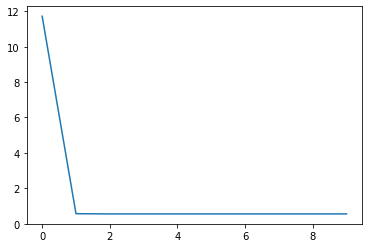

In [158]:
plt.plot(history.history['loss'])

In [159]:
tf_model.evaluate(x_test,y_test)

7500/7500 [==============================] - 5s 635us/step - loss: 0.5585 - accuracy: 0.0000e+00


[0.558492124080658, 0.0]

In [132]:
p3=tf_model.predict(x_test)
mean_squared_error(p3,y_test)

0.558492967775436

In [161]:
df2

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cont0,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,4.0,2.0,0.201470,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
1,1.0,1.0,0.0,0.0,1.0,3.0,0.0,5.0,0.0,0.743068,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
2,0.0,0.0,0.0,2.0,1.0,3.0,0.0,3.0,0.0,0.742708,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
3,1.0,1.0,0.0,2.0,1.0,3.0,0.0,4.0,2.0,0.429551,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
4,0.0,0.0,0.0,2.0,1.0,3.0,0.0,4.0,0.0,1.058291,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,1.0,1.0,0.0,0.0,1.0,3.0,0.0,4.0,0.0,0.697124,...,0.769792,0.450538,0.934360,1.005077,0.853726,0.422541,1.063463,0.697685,0.506404,7.945605
299996,0.0,1.0,0.0,2.0,1.0,1.0,0.0,4.0,4.0,0.446200,...,0.528056,0.508502,0.358247,0.257825,0.433525,0.301015,0.268447,0.577055,0.823611,7.326118
299997,1.0,1.0,0.0,2.0,1.0,2.0,0.0,4.0,6.0,0.544279,...,0.688747,0.372425,0.364936,0.383224,0.551825,0.661007,0.629606,0.714139,0.245732,8.706755
299998,0.0,1.0,0.0,2.0,1.0,1.0,0.0,4.0,4.0,0.300062,...,0.344404,0.424243,0.382028,0.468819,0.351036,0.288768,0.611169,0.380254,0.332030,7.229569


In [234]:
df4=df2.copy()
def add_col(df4):
    cat_col=[i for i in df1.columns if df1[i].dtype=='O']
    num_col=[i for i in df1.columns if df1[i].dtype=='float64' or df1[i].dtype=='int64']
    num_col.pop()
    df4['cat_total']=0
    for i in cat_col:
        df4["cat_total"]+=df4[i]
    df4["num_total"]=0
    for i in num_col:
        df4["num_total"]+=df4[i]
    return df4
df4=add_col(df4)

In [225]:
num_col.pop()
num_col

['cont0',
 'cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10',
 'cont11',
 'cont12',
 'cont13']

In [226]:
def give_score(df4):
    X=df4.drop('target',1)
    y=df4['target']
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.8,random_state=32)
    model=XGBRegressor(random_state=5)
    model.fit(x_train,y_train)
    s1=model.score(x_test,y_test)
    p=model.predict(x_test)
    s2=mean_squared_error(p,y_test)
    return print(" accuracy is :{} \n mean squared error is : {}".format(s1,s2))

In [227]:
give_score(df4)

<ipython-input-226-1dcf829c65dd>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=df4.drop('target',1)


 accuracy is :0.029591029325367613 
 mean squared error is : 0.5417468127814894


In [235]:
X=df4.drop('target',1)
y=df4['target']
final_model=XGBRegressor(random_state=5)
final_model.fit(X,y)

<ipython-input-235-23399495cf05>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=df4.drop('target',1)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=5,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [238]:
test1=convert_data(test)
test1=add_col(test1)
predictions=final_model.predict(test1)

<ipython-input-187-39e993cd28d3>:13: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  df2=pd.concat([cat_col.reset_index(drop=True),num_col.reset_index(drop=True)],1)


In [239]:
output = pd.DataFrame({'Id': test.index,
                       'target': predictions})
output.to_csv(r'C:\Mba notes\novels\Kaggle 30 days\submission2.csv', index=False)

In [51]:
x_train,x_test=train_test_split(df2,test_size=0.8,random_state=42)
x_train

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target,kfold
7977,0.0,1.0,0.0,2.0,1.0,1.0,0.0,4.0,0.0,5.0,...,0.147090,0.361234,0.459021,0.401227,0.756008,0.430726,0.800986,0.585734,7.997062,-1
65366,1.0,1.0,0.0,2.0,1.0,1.0,0.0,4.0,4.0,14.0,...,0.246244,0.532240,0.292544,0.303076,0.140092,0.067756,0.398606,0.846899,7.693674,-1
80109,0.0,1.0,1.0,2.0,1.0,1.0,0.0,4.0,4.0,11.0,...,0.311205,0.699757,0.436185,0.361186,0.081779,0.383206,0.274359,0.208910,7.009651,-1
168724,1.0,1.0,0.0,2.0,1.0,3.0,0.0,4.0,4.0,6.0,...,0.555052,0.378732,0.406043,0.314255,0.096684,0.690987,0.708516,0.664073,7.307727,-1
275449,1.0,0.0,0.0,2.0,1.0,3.0,0.0,4.0,2.0,9.0,...,0.790003,0.633072,0.264359,0.613692,0.848473,0.595363,0.554918,0.355451,7.260252,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.0,0.0,0.0,2.0,1.0,3.0,0.0,3.0,0.0,5.0,...,0.594021,1.032560,0.905694,0.852805,0.809571,0.358780,0.823077,0.865032,8.521849,-1
259178,1.0,0.0,0.0,3.0,1.0,1.0,0.0,4.0,4.0,1.0,...,0.361353,0.900748,0.468781,0.267659,0.695161,0.421088,0.841941,0.615257,8.988227,-1
131932,1.0,0.0,1.0,2.0,1.0,3.0,0.0,4.0,0.0,5.0,...,0.705946,0.896323,0.639372,0.598032,0.490381,0.134411,0.764455,0.240164,9.021154,-1
146867,1.0,0.0,0.0,2.0,1.0,3.0,0.0,4.0,6.0,9.0,...,0.331300,0.369129,0.601829,0.506245,0.583071,0.429652,0.776692,0.662461,7.701070,-1


In [48]:
df2["kfold"]=-1

In [52]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,shuffle=True,random_state=42)
for fold,(train_indices,valid_indices) in enumerate(kf.split(X=x_train)):
    print(fold,train_indices,valid_indices)

0 [    0     1     2 ... 59996 59997 59998] [    4     6     7 ... 59984 59989 59999]
1 [    2     3     4 ... 59997 59998 59999] [    0     1    11 ... 59987 59992 59995]
2 [    0     1     2 ... 59995 59996 59999] [    3     8    14 ... 59990 59997 59998]
3 [    0     1     2 ... 59997 59998 59999] [    5    15    18 ... 59991 59993 59994]
4 [    0     1     3 ... 59997 59998 59999] [    2     9    10 ... 59976 59982 59996]


In [66]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,shuffle=True,random_state=42)
for fold,(train_indices,valid_indices) in enumerate(kf.split(df2)):
    df2.loc[valid_indices,'kfold']=fold

In [67]:
df2.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target,kfold
0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,4.0,2.0,13.0,...,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634,0
1,1.0,1.0,0.0,0.0,1.0,3.0,0.0,5.0,0.0,14.0,...,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233,2
2,0.0,0.0,0.0,2.0,1.0,3.0,0.0,3.0,0.0,5.0,...,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351,4
3,1.0,1.0,0.0,2.0,1.0,3.0,0.0,4.0,2.0,10.0,...,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253,3
4,0.0,0.0,0.0,2.0,1.0,3.0,0.0,4.0,0.0,13.0,...,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260,1


In [68]:
df2.kfold.value_counts()

0    60000
2    60000
4    60000
3    60000
1    60000
Name: kfold, dtype: int64

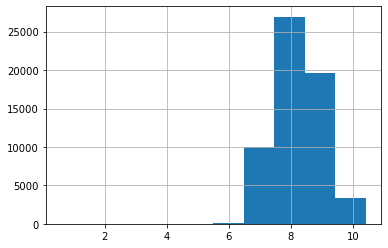

In [72]:
df2[df2.kfold==1].target.hist()

In [78]:
for fold in range(5):
    xtrain=df2[df2.kfold!=fold]
    xvalid=df2[df2.kfold==fold].reset_index(drop=True)

In [79]:
x_train.shape,xvalid.shape

((60000, 26), (60000, 26))